In [3]:
from datasets import load_dataset

ds = load_dataset("Artificio/WikiArt_Full", split='train')

In [4]:
ds.features.items()

ds_test = ds.select(range(100))

len(ds_test)

100

### NumPy generator:

Time: 0.45177292823791504


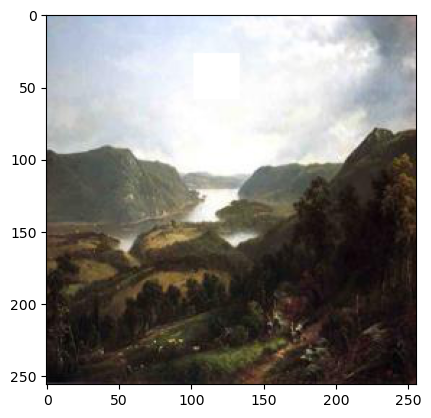

In [5]:
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import time
import PIL


def generate_square_damage(image: np.ndarray, square_side=64) -> np.ndarray:
    image = np.array(image)

    damage = np.full((square_side, square_side, 3), 255)

    x = np.random.randint(0, 256 - square_side)
    y = np.random.randint(0, 256 - square_side)

    image[x:x+square_side, y:y+square_side] = damage

    return PIL.Image.fromarray(image)

start = time.time()
for i in range(100):
    image_original = np.array(ds[i]['image'])
    image = generate_square_damage(image_original.copy(), square_side=32)
end = time.time()

print(f'Time: {end - start}')

plt.imshow(image)
plt.show()

h5py

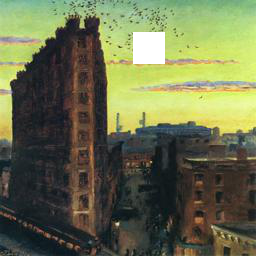

In [6]:
import h5py

# 3. Dodanie nowej kolumny `image_square_damage` do datasetu
def add_damaged_images(batch):
    batch['image_square_damage'] = [generate_square_damage(image, 32) for image in batch['image']]
    return batch

# Przetwarzanie całego zestawu danych w blokach
ds_with_damaged_images = ds_test.map(add_damaged_images, batched=True)

ds_with_damaged_images[0]['image_square_damage']